In [1]:
!export HTTP_PROXY="http://10.68.69.53:80"
!export HTTPS_PROXY="http://10.68.69.53:80"

!export http_proxy="http://10.68.69.53:80"
!export https_proxy="http://10.68.69.53:80"

In [5]:
import torch
from src.dataLoader import Loader
from src.plots import Plots
from src.model import Model_loader
from src.optimise import learner

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
train_transform,test_transform = Loader.transform()
train_data,test_data = Loader.Loader(train_transform,test_transform)

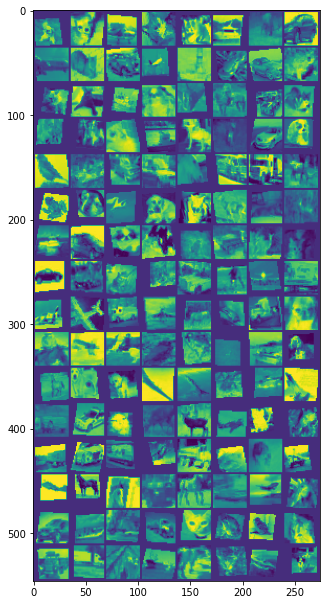

In [3]:
Plots.sampleVisual(train_data)

In [4]:
use_cuda = torch.cuda.is_available()
device = 'cuda:0' if use_cuda else 'cpu'

In [7]:
model = Model_loader.models(device)
(ln_train_acc, ln_train_losses, ln_test_acc, ln_test_losses), ln_model= learner(model, train_data, test_data,2, device)

  0%|          | 0/391 [00:00<?, ?it/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
         MaxPool2d-8           [-1, 32, 16, 16]               0
            Conv2d-9           [-1, 64, 16, 16]          18,432
             ReLU-10           [-1, 64, 16, 16]               0
      BatchNorm2d-11           [-1, 64, 16, 16]             128
          Dropout-12           [-1, 64, 16, 16]               0
           Conv2d-13           [-1, 64, 16, 16]          36,864
             ReLU-14           [-1, 64,

Loss=1.0525245666503906 Batch_id=390 Accuracy=48.12: 100%|██████████| 391/391 [00:26<00:00, 14.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0542, Accuracy: 30964/50000 (61.93%)

Epoch 2:


Loss=1.3563646078109741 Batch_id=390 Accuracy=62.08: 100%|██████████| 391/391 [00:23<00:00, 16.50it/s]



Test set: Average loss: 0.8138, Accuracy: 35584/50000 (71.17%)



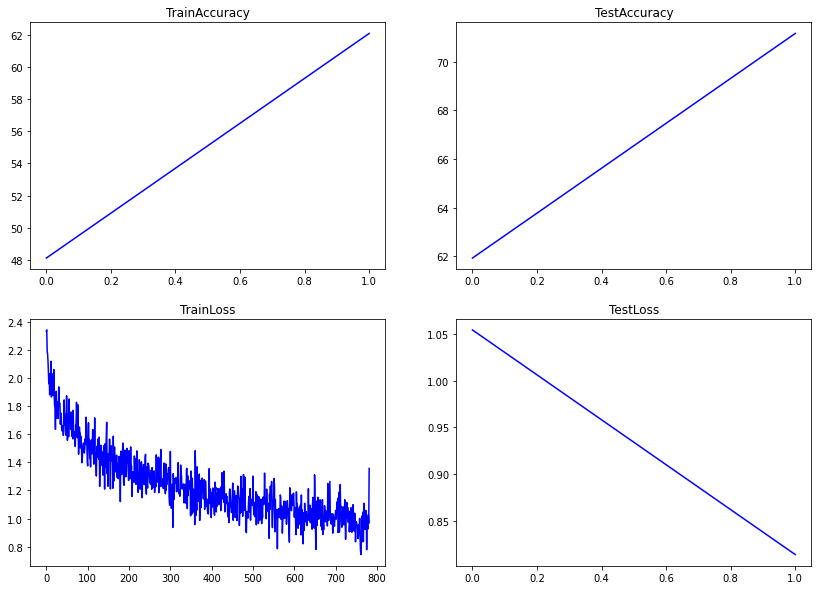

In [8]:
Plots.stat_graph(ln_train_acc, ln_train_losses, ln_test_acc, ln_test_losses)

In [9]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_data:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = ln_model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 84 %
Accuracy of   car : 87 %
Accuracy of  bird : 58 %
Accuracy of   cat : 44 %
Accuracy of  deer : 63 %
Accuracy of   dog : 46 %
Accuracy of  frog : 78 %
Accuracy of horse : 82 %
Accuracy of  ship : 79 %
Accuracy of truck : 83 %
